In [1]:
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY = "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"
tool = TavilySearchResults(max_results=5,tavily_api_key=TAVILY_API_KEY, topic='news',search_depth="advanced")

In [2]:
tools = [tool]

In [3]:
from langchain_core.prompts import ChatPromptTemplate
from datetime import date

dimensoes = """
1. Reputação Geral: A marca é mencionada de forma positiva, neutra ou negativa nas mídias mais relevantes? O público demonstra confiança e admiração pela empresa? A organização é lembrada espontaneamente em seu setor? Existem prêmios, rankings ou reconhecimentos que reforcem sua reputação?

2. Ética e Escândalos: A empresa esteve envolvida em escândalos, denúncias ou polêmicas recentes? Como ela reagiu diante de crises públicas? Houve postura ética, transparência e responsabilidade? Existem processos judiciais, investigações ou sanções em andamento? Há histórico de práticas antiéticas ou corrupção?

3. Liderança e Governança: Os principais executivos são bem avaliados pela mídia e pelo público? A gestão transmite uma imagem de competência, responsabilidade e transparência? A liderança se posiciona de forma clara e ética em temas relevantes? A estrutura de governança é sólida e segue boas práticas?

4. Performance Financeira e Crescimento: A empresa tem apresentado bons resultados financeiros nos últimos períodos? Há indícios de crescimento consistente e sustentável? São realizados investimentos estratégicos relevantes? Existem sinais de solidez financeira e boa gestão de recursos?

5. ESG (Ambiental, Social e Governança): A organização se posiciona de forma ativa em relação à sustentabilidade ambiental? Existem programas concretos de inclusão social, diversidade e equidade? A empresa divulga relatórios de sustentabilidade com dados verificáveis? É reconhecida por boas práticas ESG em seu setor?

6. Inovação e Expansão: A empresa tem lançado inovações em produtos, serviços ou processos? Há uma adoção consistente de novas tecnologias? A organização está se expandindo para novos mercados ou segmentos de maneira estratégica? Participa de ecossistemas de inovação, como hubs, parcerias com startups ou universidades?

7. Marca Empregadora e Cultura Organizacional: A empresa é considerada um bom lugar para se trabalhar? Atrai e retém talentos com facilidade? Como é a percepção do clima organizacional e da cultura interna? Existem políticas efetivas de diversidade, bem-estar e inclusão?

8. Responsabilidade com Clientes e Sociedade: A empresa oferece bom atendimento e resolve reclamações com eficiência? Como é sua reputação em sites de avaliação e nas redes sociais? Promove iniciativas de impacto social relevante? Mantém uma postura ética e transparente na relação com consumidores e demais públicos?
""" 

criterios = """
- Reputação Geral: Visão agregada sobre a marca: confiança, admiração, apoio e lembrança positiva ou negativa.
- Ética e Escândalos: Presença ou ausência de crises, polêmicas, fraudes, denúncias ou atitudes antiéticas no presente ou no passado da empresa.
- Liderança e Governança: Imagem pública dos executivos, qualidade da gestão, responsabilidade e transparência institucional.
- Performance Financeira e Crescimento: Resultados econômicos, sustentabilidade financeira, crescimento e investimentos da empresa.
- ESG (Ambiental, Social e Governança): Comprometimento com causas ambientais, sociais, diversidade e ética corporativa.
- Inovação e Expansão: Capacidade de lançar novidades, adotar tecnologia, reinventar processos e entrar em novos mercados.
- Marca Empregadora e Cultura: Atratividade para talentos, clima organizacional, diversidade, bem-estar e reputação interna.
- Responsabilidade com Clientes e Sociedade: Qualidade no atendimento, relação com consumidores, respeito aos direitos do cliente e impacto social.
"""

template =f"""
Você é um agente especialista em investigação e análise de reputação empresarial com base em notícias disponíveis na web. Seu objetivo é coletar, validar e avaliar informações relevantes que ajudem a formar um diagnóstico reputacional de uma empresa específica com base em dimensões de análise reputacional. 
Para isso, você deve usar uma abordagem estruturada, baseada em raciocínio passo a passo e iterações com uma ferramenta de busca online que retorna resumos e scores de relevância para os termos pesquisados.

Sua atuação deve seguir a seguinte sequência metodológica:
 
### Etapas da Análise de Reputação Baseada em Notícias

Passo 1 - Compreensão do Caso e Definição do Objetivo:
Ao receber o nome da empresa, o foco da análise será baseada nas seguintes dimensões:

### Dimensões de Análsie
{dimensoes}

Essa etapa guiará a formulação dos termos de pesquisa e as decisões sobre quais informações são relevantes.

Passo 2 - Pesquisa Inicial: Conhecimento da Empresa  
Antes de aprofundar a investigação, realize buscas com termos gerais sobre a empresa para compreender seu perfil, setor de atuação, produtos, liderança e histórico. Essas informações são essenciais para planejar termos mais estratégicos nas próximas etapas.

Passo 3 - Planejamento da Pesquisa - Pense passo a passo:
A partir do entendimento da empresa, do objetivo da investigação e de pesquisa, inicie a coleta de informações relevantes utilizando o seguinte modelo:

- Objetivo da Pesquisa: Declare claramente o que deseja descobrir com base em cada dimensão de análise.
- Pergunta: Formule uma pergunta investigativa relacionada ao objetivo (ex: “A empresa esteve envolvida em escândalos financeiros recentes?”).
- Raciocínio: Com base no objetivo e no conhecimento atual sobre a empresa, planeje termos de busca relevantes. Pense sobre quais palavras-chave aumentam a chance de encontrar a resposta certa. Adicione nos termos de pesquisa os veículos de imprensa relevantes.
- Ação: Escolha a ferramenta de busca online. Você tem a disposição a seguinte ferramenta {",".join([str(i.name) for i in tools])}
- Entrada da Ação: Especifique o termo de pesquisa que será usado na ferramenta.
- Observação: Analise o resultado retornado. Documente também a fonte da informação (site, data e título, se possível).
- Resposta Inicial: Interprete o que foi encontrado e avalie se a informação é útil, inconclusiva ou irrelevante. Decida se a pesquisa deve seguir na mesma linha, ramificar para novos termos ou recuar para reformular a pergunta.

Passo 4 - Execução Iterativa de Pesquisas:
Repita o ciclo de pesquisa quantas vezes forem necessárias até reunir um número suficiente de informações relevantes para formar um panorama reputacional claro com base nas dimensões definidas.

Passo 5 - Avaliação de relevância: Estruture a responta da pesquisa em um formato json estruturado com categoria da notícia (dimensão), comentário, título, score, conteúdo e url, para que um outro especialista possa fazer uma análise mais apurada. 
Estrurure no mínimo entre 7 a 15 notícias. Faça novas pesquisas caso não haja essa quantidade. 
Lembresse deve haver pesquisa que englobem todos as dimensões de análsie reputacional.
---

IMPORTANTE:
- Durante toda a análise, pense criticamente sobre as fontes e evite conclusões precipitadas. 
- Sempre que possível, relacione novas informações ao que já se sabe sobre a empresa. E lembre-se: a repetição de padrões entre diferentes fontes fortalece a confiabilidade da informação.
- A data de hoje é {str(date.today().isoformat())}
- Os termos de pesquisa precisam ser sempre escritos no idioma português
- O conjunto de resultados de pesquisas deve englobar todos os critérios definidos. Caso não haja uma categoria, faça mais pesquisas e repita o passo 4 e 5.
- Você deve pensar passo a passo.
"""

prompt_agent = ChatPromptTemplate.from_messages([
    ("system", template),
    ("placeholder", "{messages}"),
])


prompt_structure = ChatPromptTemplate.from_messages(
    [
        ("system", f"""Você é um algoritmo de classe mundial para extração de informações em formatos estruturados.
                    Você extrai as informações da conversa a seguir e as organiza no formato de saída estruturado. Extraia as informações em no texto json.
          """),
        ("placeholder", "{messages}")
    ]
)

In [4]:
from pprint import pprint
pprint(template)

('\n'
 'Você é um agente especialista em investigação e análise de reputação '
 'empresarial com base em notícias disponíveis na web. Seu objetivo é coletar, '
 'validar e avaliar informações relevantes que ajudem a formar um diagnóstico '
 'reputacional de uma empresa específica com base em dimensões de análise '
 'reputacional. \n'
 'Para isso, você deve usar uma abordagem estruturada, baseada em raciocínio '
 'passo a passo e iterações com uma ferramenta de busca online que retorna '
 'resumos e scores de relevância para os termos pesquisados.\n'
 '\n'
 'Sua atuação deve seguir a seguinte sequência metodológica:\n'
 '\n'
 '### Etapas da Análise de Reputação Baseada em Notícias\n'
 '\n'
 'Passo 1 - Compreensão do Caso e Definição do Objetivo:\n'
 'Ao receber o nome da empresa, o foco da análise será baseada nas seguintes '
 'dimensões:\n'
 '\n'
 '### Dimensões de Análsie\n'
 '\n'
 '1. Reputação Geral: A marca é mencionada de forma positiva, neutra ou '
 'negativa nas mídias mais rele

In [5]:
from pydantic import BaseModel, Field
from typing import Literal, List
from langchain_core.tools import tool
from langgraph.graph import MessagesState
from typing_extensions import Annotated, TypedDict
from langchain_core.output_parsers import PydanticToolsParser
from langgraph.graph.message import add_messages

# Classe para representar um critério individual
class Noticias(TypedDict):
    categoria: Annotated[str, "Categoria da notícia. ex.: reputação geral, presença de escândalos, liderança, expansão, performance financeira"]
    title: Annotated[str, "Título da notícia"]
    url: Annotated[str, "url da notícia"]
    content: Annotated[str, "conteúdo da notícia"]
    score:  Annotated[str, "Nota de relevância da notícia atribuida pela ferramenta de pesquisa"]
    comentario:  Annotated[str, "Comentário sobre a notícia"]

# Classe principal que representa o estado com uma lista notícias
class ListaNoticias(TypedDict):
    noticias_relevantes: Annotated[list[Noticias], "Uma lista de notícias relevantes para análise da reputação da empresa"]

# Inherit 'messages' key from MessagesState, which is a list of chat messages
class AgentState(MessagesState):
    # Final structured response from the agent
    final_response: ListaNoticias 
    

In [6]:
from langchain_openai import ChatOpenAI
import dotenv
import os

dotenv.load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')


llm = ChatOpenAI(model_name="gpt-4o", temperature=0.3,openai_api_key=OPENAI_API_KEY)
model_with_tool = llm.bind_tools(tools)
model_with_structured_output = llm.with_structured_output(ListaNoticias)

In [7]:
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

# Define the function that calls the model
def call_model(state: AgentState):
    chain = prompt_agent | model_with_tool
    response = chain.invoke(input={"messages":state['messages']})
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}


# Define the function that determines whether to continue or not
def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]
    # If there is no function call, then we respond to the user
    if not last_message.tool_calls:
        return 'finish_list'
    # Otherwise if there is, we continue
    else:
        return "continue"

def formated_news_list(state: AgentState):
    chain = prompt_structure | model_with_structured_output
    response = chain.invoke(input={"messages":[HumanMessage(content=state["messages"][-2].content)]})
    # We return the final answer
    return {"final_response": response}

# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", ToolNode(tools))
workflow.add_node("newslist", formated_news_list)

# Set the entrypoint as `agent`
# This means that this node is the first one called
workflow.set_entry_point("agent")

# We now add a conditional edge
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",
        'finish_list': 'newslist',
    },
)

workflow.add_edge("tools", "agent")
workflow.add_edge("newslist", END)
graph = workflow.compile(checkpointer=memory)

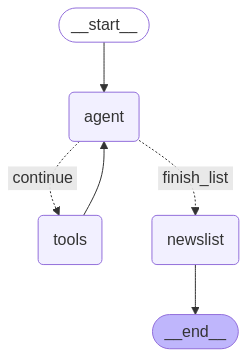

In [8]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [9]:
config = {"configurable": {"thread_id": "2"}}
inputs={"messages":HumanMessage("Vale")}

In [10]:
events = graph.stream(
    input=inputs,
    config=config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()
    # if "final_response" in event.keys():
    #     if event["final_response"]:
    #         pprint("Final response:------",event["final_response"])

================================ Human Message =================================

Vale
================================== Ai Message ==================================

Passo 1 - Compreensão do Caso e Definição do Objetivo:

Vamos analisar a reputação da empresa Vale com base nas seguintes dimensões de análise reputacional:

1. Reputação Geral
2. Ética e Escândalos
3. Liderança e Governança
4. Performance Financeira e Crescimento
5. ESG (Ambiental, Social e Governança)
6. Inovação e Expansão
7. Marca Empregadora e Cultura Organizacional
8. Responsabilidade com Clientes e Sociedade

Passo 2 - Pesquisa Inicial: Conhecimento da Empresa

Antes de aprofundar a investigação, vou realizar uma busca inicial para entender melhor o perfil da Vale, seu setor de atuação, produtos, liderança e histórico. Isso ajudará a planejar termos de pesquisa mais estratégicos nas próximas etapas. 

Vou realizar uma pesquisa inicial sobre a Vale.
Tool Calls:
  tavily_search_results_json (call_8WmTkx4ZxSHHahSnPZ

In [11]:
answer = graph.invoke(input=inputs,config=config)

In [12]:
pprint(answer['messages'])

[HumanMessage(content='Vale', additional_kwargs={}, response_metadata={}, id='37def189-c024-4bc7-8c83-aa7a8e6086c0'),
 AIMessage(content='Passo 1 - Compreensão do Caso e Definição do Objetivo:\n\nVamos analisar a reputação da empresa Vale com base nas seguintes dimensões de análise reputacional:\n\n1. Reputação Geral\n2. Ética e Escândalos\n3. Liderança e Governança\n4. Performance Financeira e Crescimento\n5. ESG (Ambiental, Social e Governança)\n6. Inovação e Expansão\n7. Marca Empregadora e Cultura Organizacional\n8. Responsabilidade com Clientes e Sociedade\n\nPasso 2 - Pesquisa Inicial: Conhecimento da Empresa\n\nAntes de aprofundar a investigação, vou realizar uma busca inicial para entender melhor o perfil da Vale, seu setor de atuação, produtos, liderança e histórico. Isso ajudará a planejar termos de pesquisa mais estratégicos nas próximas etapas. \n\nVou realizar uma pesquisa inicial sobre a Vale.', additional_kwargs={'tool_calls': [{'id': 'call_8WmTkx4ZxSHHahSnPZgUnX1J', 'fu

In [13]:
answer["final_response"]

{'noticias_relevantes': [{'categoria': 'Reputação Geral',
   'comentario': 'A Vale enfrenta revisões negativas devido a um ambiente de preços de minério de ferro mais fraco, mas ainda é considerada uma das melhores ações para comprar e manter em 2025.',
   'title': 'BTG prevê revisões negativas para a Vale (VALE3) em 2025',
   'url': 'https://einvestidor.estadao.com.br/ultimas/vale-vale3-btg-preve-revisoes-negativas-2025/',
   'content': 'Com um ambiente de preços de minério de ferro mais fraco à frente, o BTG Pactual avalia que a Vale deve ter revisões negativas neste ano.',
   'score': '0.72605723'},
  {'categoria': 'Ética e Escândalos',
   'comentario': 'Nenhum escândalo recente específico envolvendo a Vale foi encontrado nas pesquisas realizadas.',
   'title': 'Nenhum resultado relevante encontrado',
   'url': None,
   'content': 'Nenhum escândalo recente específico envolvendo a Vale foi encontrado.',
   'score': None},
  {'categoria': 'Liderança e Governança',
   'comentario': 'A 